In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows=7
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(15,5)
plt.rcParams["font.family"]=("sans-serif")

In [3]:
request=pd.read_csv("../resources/311-service-requests.csv")

/home/kate/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
request

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


In [5]:
request["Incident Zip"].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

In [6]:
# Исправление ошибок с NAN и различий - строки/числа
nan_values=["NO CLUE","N/A","0"]

In [7]:
request=pd.read_csv("../resources/311-service-requests.csv",na_values=nan_values,dtype={"Incident Zip":str})

In [8]:
request["Incident Zip"].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [9]:
zips=request["Incident Zip"]

In [10]:
is_close=zips.str.startswith("0")|zips.str.startswith("1")
is_close

0         True
1         True
2         True
          ... 
111066    True
111067    True
111068    True
Name: Incident Zip, Length: 111069, dtype: bool

In [11]:
is_close.value_counts()


True     98793
False    12276
Name: Incident Zip, dtype: int64

In [12]:
is_far=~(is_close)&zips.notnull()

In [13]:
is_far

0         False
1         False
2         False
          ...  
111066    False
111067    False
111068    False
Name: Incident Zip, Length: 111069, dtype: bool

In [14]:
# is_far=is_far.astype(int)

In [15]:
# is_far.value_counts()

In [16]:
zips[is_far]

12102         77056
13450         70711
29136    77092-2016
            ...    
85821    29616-0759
89304    35209-3114
94201         41042
Name: Incident Zip, Length: 13, dtype: object

In [17]:
request[is_far][["Incident Zip","Descriptor","City"]].sort_values("Incident Zip")

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616-0759,Debt Not Owed,GREENVILLE
...,...,...,...
44008,90010,Billing Dispute,LOS ANGELES
57636,92123,Harassment,SAN DIEGO
71001,92123,Billing Dispute,SAN DIEGO


In [18]:
request1=request["City"].str.upper().value_counts()
request1

BROOKLYN      31662
NEW YORK      22664
BRONX         18438
              ...  
FREEPORT          1
SYRACUSE          1
BIRMINGHAM        1
Name: City, Length: 100, dtype: int64

<AxesSubplot:>

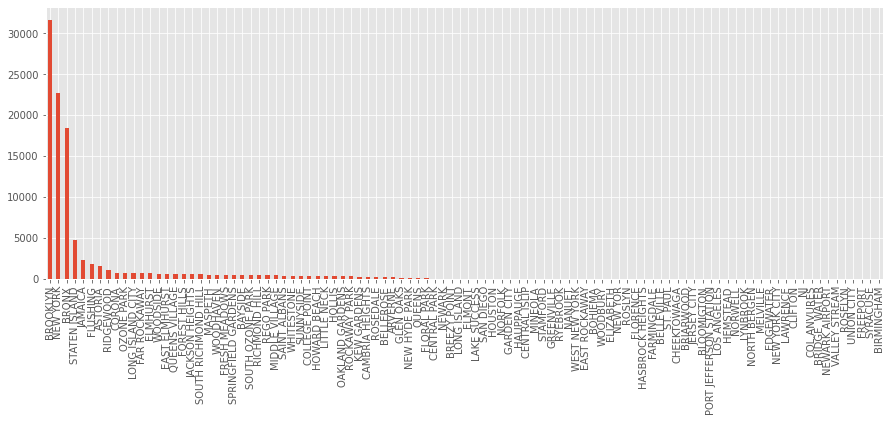

In [19]:
request1.plot(kind="bar")

In [20]:
rows_with_dashes=request["Incident Zip"].str.contains("-").fillna(False)
len(request[rows_with_dashes])

5

In [21]:
request[rows_with_dashes]["Incident Zip"]

29136    77092-2016
30939    55164-0737
70539    11549-3650
85821    29616-0759
89304    35209-3114
Name: Incident Zip, dtype: object

In [23]:
long_zip_codes=request["Incident Zip"].str.len()>5
request["Incident Zip"][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [25]:
request["Incident Zip"]=request["Incident Zip"].str.slice(0,5)

In [33]:
request[request["Incident Zip"]=="00000"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
zero_zips=request["Incident Zip"]=="00000"
request.loc[zero_zips,"Incident Zip"]=np.nan

In [35]:
unik_zips=request["Incident Zip"].unique()

In [36]:
unik_zips

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',